# Used Car Price Prediction

This notebook uses 2 datasets obtained from Kaggle that uses the MSRP of new vehicles and values of used cars with certain conditions based on by the seller. The price of value vehicles are going to predicted based on the condition of their features. This model will help future vehicle sellers and buyers have an estimated price to be more efficient in selling and buying. 

All the modules and packages that will be used in this notebook can be seen here.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np 
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing
from scipy.stats import iqr
from sklearn import ensemble

In [2]:
new_car = pd.read_csv(r"C:/Users/ryanp/Desktop/Springboard/Springboard/New_cars_price.csv")
used_car = pd.read_csv(r"C:/Users/ryanp/Desktop/Springboard/Springboard/vehicles.csv", index_col = 0)

C:\Users\ryanp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (15,16,55) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### **New Car Data**

In [3]:
new_car.shape

(32316, 57)

The new vehicle dataset contains 32,316 rows and 57 columns. 

In [4]:
new_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32316 entries, 0 to 32315
Data columns (total 57 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Model                                 32316 non-null  object 
 1   MSRP                                  32262 non-null  object 
 2   EPA Fuel Economy Est - City (MPG)     27027 non-null  object 
 3   Engine                                30341 non-null  object 
 4   EPA Classification                    19866 non-null  object 
 5   Style Name                            32316 non-null  object 
 6   Drivetrain                            30600 non-null  object 
 7   Passenger Capacity                    32316 non-null  int64  
 8   Passenger Doors                       32316 non-null  int64  
 9   Body Style                            30600 non-null  object 
 10  Transmission                          29602 non-null  object 
 11  Base Curb Weigh

In [5]:
new_car.head()

,Model,MSRP,EPA Fuel Economy Est - City (MPG),Engine,EPA Classification,Style Name,Drivetrain,Passenger Capacity,Passenger Doors,Body Style,...,Corrosion Miles/km,Corrosion Years,Drivetrain Miles/km,Drivetrain Years,Turning Diameter - Curb to Curb (ft),Front Wheel Material,Front Tire Size,Stabilizer Bar Diameter - Front (in),Roadside Assistance Years,Roadside Assistance Miles/km
0,2019 Acura RDX Specs: FWD w/Technology Pkg,"$40,600",22,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD w/Technology Pkg,Front Wheel Drive,5,4,Sport Utility,...,Unlimited,5.0,"70,000",6.0,39,Aluminum,P235/55HR19,NaN,4,"50,000"
1,2019 Acura RDX Specs: FWD w/Advance Pkg,"$45,500",22,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD w/Advance Pkg,Front Wheel Drive,5,4,Sport Utility,...,Unlimited,5.0,"70,000",6.0,39,Aluminum,P235/55HR19,NaN,4,"50,000"
2,2019 Acura RDX Specs: FWD w/A-Spec Pkg,"$43,600",22,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD w/A-Spec Pkg,Front Wheel Drive,5,4,Sport Utility,...,Unlimited,5.0,"70,000",6.0,39,Aluminum,P255/45VR20,NaN,4,"50,000"
3,2019 Acura RDX Specs: FWD,"$37,400",22,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD,Front Wheel Drive,5,4,Sport Utility,...,Unlimited,5.0,"70,000",6.0,39,Aluminum,P235/55HR19,NaN,4,"50,000"
4,2019 Acura RDX Specs: AWD w/Technology Pkg,"$42,600",21,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 4WD,AWD w/Technology Pkg,All Wheel Drive,5,4,Sport Utility,...,Unlimited,5.0,"70,000",6.0,39,Aluminum,P235/55HR19,NaN,4,"50,000"


In [6]:
missing_new = pd.concat([new_car.isnull().sum(), 100 * new_car.isnull().mean()], axis=1)
missing_new.columns = ['count', '%']
missing_new.sort_values(by='count')

,count,%
Model,0,0.000000
Air Bag-Side Body-Front,0,0.000000
Air Bag-Side Body-Rear,0,0.000000
Air Bag-Side Head-Front,0,0.000000
Air Bag-Side Head-Rear,0,0.000000
Brakes-ABS,0,0.000000
Child Safety Rear Door Locks,0,0.000000
Daytime Running Lights,0,0.000000
Traction Control,0,0.000000
Night Vision,0,0.000000


In [7]:
new_car.drop(new_car.columns.difference(['Model','MSRP']), 1, inplace=True)
new_car.head()

,Model,MSRP
0,2019 Acura RDX Specs: FWD w/Technology Pkg,"$40,600"
1,2019 Acura RDX Specs: FWD w/Advance Pkg,"$45,500"
2,2019 Acura RDX Specs: FWD w/A-Spec Pkg,"$43,600"
3,2019 Acura RDX Specs: FWD,"$37,400"
4,2019 Acura RDX Specs: AWD w/Technology Pkg,"$42,600"


In [8]:
new_car.shape

(32316, 2)

The only data needed from this dataset is the MSRP value and the model of the vehicle. This will be used to compare to the used price vehicle to identify deprciation of the price after being used and change of conditions. 

In [9]:
new_prices = new_car.dropna()
new_prices.shape

(32262, 2)

In [10]:
new_prices.nunique()

Model    32262
MSRP     10228
dtype: int64

In [11]:
print(new_prices.isnull().sum())

Model    0
MSRP     0
dtype: int64


In [12]:
new_prices['MSRP'] = new_prices['MSRP'].str.replace("$", "").str.replace(",", "").astype(int)

C:\Users\ryanp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
new_prices['MSRP'].head()

0    40600
1    45500
2    43600
3    37400
4    42600
Name: MSRP, dtype: int32

In [14]:
new_prices['Model'].tail()

32311    2018 Volvo V60 Cross Country Specs: T5 AWD Pla...
32312    2016 Volvo V60 Cross Country Specs: 4-Door Wag...
32313    2016 Volvo V60 Cross Country Specs: 4-Door Wag...
32314    2015 Volvo V60 Cross Country Specs: 2015.5 4-D...
32315    2015 Volvo V60 Cross Country Specs: 2015.5 4-D...
Name: Model, dtype: object

In [15]:
new_prices.head()

,Model,MSRP
0,2019 Acura RDX Specs: FWD w/Technology Pkg,40600
1,2019 Acura RDX Specs: FWD w/Advance Pkg,45500
2,2019 Acura RDX Specs: FWD w/A-Spec Pkg,43600
3,2019 Acura RDX Specs: FWD,37400
4,2019 Acura RDX Specs: AWD w/Technology Pkg,42600


In [16]:
new_model = new_prices['Model'].unique()
new_model

array(['2019 Acura RDX Specs: FWD w/Technology Pkg',
       '2019 Acura RDX Specs: FWD w/Advance Pkg',
       '2019 Acura RDX Specs: FWD w/A-Spec Pkg', ...,
       '2016 Volvo V60 Cross Country Specs: 4-Door Wagon T5 Platinum AWD',
       '2015 Volvo V60 Cross Country Specs: 2015.5 4-Door Wagon T5 AWD',
       '2015 Volvo V60 Cross Country Specs: 2015.5 4-Door Wagon T5 Platinum AWD'],
      dtype=object)

The data is cleaned up to easily be used for analysis as well as to merge the data with used car dataset. 

**Used Car Data**

In [17]:
used_car.shape

(458213, 25)

The used car dataset is loaded and shows 458,213 rows and 25 columns. 

In [18]:
used_car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458213 entries, 0 to 458212
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            458213 non-null  int64  
 1   url           458213 non-null  object 
 2   region        458213 non-null  object 
 3   region_url    458213 non-null  object 
 4   price         458213 non-null  int64  
 5   year          457163 non-null  float64
 6   manufacturer  439993 non-null  object 
 7   model         453367 non-null  object 
 8   condition     265273 non-null  object 
 9   cylinders     287073 non-null  object 
 10  fuel          454976 non-null  object 
 11  odometer      402910 non-null  float64
 12  title_status  455636 non-null  object 
 13  transmission  455771 non-null  object 
 14  VIN           270664 non-null  object 
 15  drive         324025 non-null  object 
 16  size          136865 non-null  object 
 17  type          345475 non-null  object 
 18  pain

In [19]:
used_car.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,4 cylinders,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,4 cylinders,...,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


In [20]:
missing_used = pd.concat([used_car.isnull().sum(), 100 * used_car.isnull().mean()], axis=1)
missing_used.columns = ['count', '%']
missing_used.sort_values(by='count')

,count,%
id,0,0.000000
url,0,0.000000
region,0,0.000000
region_url,0,0.000000
price,0,0.000000
state,0,0.000000
image_url,28,0.006111
posting_date,28,0.006111
description,70,0.015277
year,1050,0.229151


In [21]:
used_car.drop(['region', 'title_status', 'paint_color', 'id', 'url', 'region_url', 'VIN', 'image_url', 'lat', 'long', 'description', 'state', 'posting_date'], axis=1, inplace=True)

In [22]:
used_car = used_car.dropna()

There are many features listed with the used vehicles; however, only the pertienent features are needed. Furthermore, all null values were dropped since the data cannot be filled with the average conditions of the vehicle. 

In [23]:
print(used_car.isnull().sum())

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
size            0
type            0
dtype: int64


In [24]:
used_car.shape

(90871, 12)

The new shape of the used car dataset is 90,817 rows and 12 columns 

In [25]:
used_car['year'] = used_car['year'].astype(int)
used_car['year'].head()

3     1974
4     2005
14    2003
19    2020
47    2010
Name: year, dtype: int32

In [26]:
used_car['year'] = used_car['year'].astype(str)
used_car['year'].head()

3     1974
4     2005
14    2003
19    2020
47    2010
Name: year, dtype: object

In [27]:
used_car['odometer'] = used_car['odometer'].astype(int)
used_car['odometer'].head()

3     190000
4     116000
14    177000
19     10500
47     82000
Name: odometer, dtype: int32

In [28]:
used_car.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type
3,2000,1974,chevrolet,c-10,good,4 cylinders,gas,190000,automatic,rwd,full-size,pickup
4,19500,2005,ford,f350 lariat,excellent,8 cylinders,diesel,116000,automatic,4wd,full-size,pickup
14,4900,2003,ford,expedition,good,8 cylinders,gas,177000,automatic,rwd,full-size,SUV
19,47000,2020,jeep,gladiator,like new,6 cylinders,gas,10500,automatic,4wd,full-size,pickup
47,6250,2010,ford,fusion sel,good,6 cylinders,gas,82000,automatic,fwd,full-size,sedan


In [29]:
used_car["Model"] = used_car['year'] + ' ' + used_car["manufacturer"] + ' ' + used_car["model"]

In [30]:
used_car['Model'].head()

3       1974 chevrolet c-10
4     2005 ford f350 lariat
14     2003 ford expedition
19      2020 jeep gladiator
47     2010 ford fusion sel
Name: Model, dtype: object

In [31]:
used_car['manufacturer'].unique()

array(['chevrolet', 'ford', 'jeep', 'mercedes-benz', 'gmc', 'bmw',
       'honda', 'nissan', 'kia', 'ram', 'mitsubishi', 'hyundai', 'toyota',
       'mazda', 'dodge', 'audi', 'infiniti', 'lexus', 'volkswagen',
       'cadillac', 'pontiac', 'subaru', 'chrysler', 'fiat', 'rover',
       'mini', 'mercury', 'buick', 'tesla', 'lincoln', 'jaguar', 'volvo',
       'saturn', 'acura', 'porsche', 'land rover', 'alfa-romeo', 'datsun',
       'ferrari', 'aston-martin', 'harley-davidson'], dtype=object)

In [32]:
used_model = used_car['Model'].unique()
used_model

array(['1974 chevrolet c-10', '2005 ford f350 lariat',
       '2003 ford expedition', ..., '2010 chevrolet cargo van',
       '2005 buick rendezvous cx', '2014 cadillac cts coupe awd'],
      dtype=object)

In [33]:
used_car.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,Model
3,2000,1974,chevrolet,c-10,good,4 cylinders,gas,190000,automatic,rwd,full-size,pickup,1974 chevrolet c-10
4,19500,2005,ford,f350 lariat,excellent,8 cylinders,diesel,116000,automatic,4wd,full-size,pickup,2005 ford f350 lariat
14,4900,2003,ford,expedition,good,8 cylinders,gas,177000,automatic,rwd,full-size,SUV,2003 ford expedition
19,47000,2020,jeep,gladiator,like new,6 cylinders,gas,10500,automatic,4wd,full-size,pickup,2020 jeep gladiator
47,6250,2010,ford,fusion sel,good,6 cylinders,gas,82000,automatic,fwd,full-size,sedan,2010 ford fusion sel


In [34]:
used_car.drop(['manufacturer', 'model'], axis =1, inplace=True)
used_car.head()

,price,year,condition,cylinders,fuel,odometer,transmission,drive,size,type,Model
3,2000,1974,good,4 cylinders,gas,190000,automatic,rwd,full-size,pickup,1974 chevrolet c-10
4,19500,2005,excellent,8 cylinders,diesel,116000,automatic,4wd,full-size,pickup,2005 ford f350 lariat
14,4900,2003,good,8 cylinders,gas,177000,automatic,rwd,full-size,SUV,2003 ford expedition
19,47000,2020,like new,6 cylinders,gas,10500,automatic,4wd,full-size,pickup,2020 jeep gladiator
47,6250,2010,good,6 cylinders,gas,82000,automatic,fwd,full-size,sedan,2010 ford fusion sel


The data set was cleaned to match the model with the new car dataset in order to merge on that column. The data contains the features that will be used to analysed and predict vehicle values. 

**Combining Data**

In [35]:
new_prices['Model'] = new_prices['Model'].str.split(':').str[0]
new_prices['Model'].tail()

C:\Users\ryanp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


32311    2018 Volvo V60 Cross Country Specs
32312    2016 Volvo V60 Cross Country Specs
32313    2016 Volvo V60 Cross Country Specs
32314    2015 Volvo V60 Cross Country Specs
32315    2015 Volvo V60 Cross Country Specs
Name: Model, dtype: object

In [36]:
new_prices['Model'].head()

0    2019 Acura RDX Specs
1    2019 Acura RDX Specs
2    2019 Acura RDX Specs
3    2019 Acura RDX Specs
4    2019 Acura RDX Specs
Name: Model, dtype: object

In [37]:
f = lambda x: x['Model'].strip("Cross Country Specs")
new_prices['Model'] = new_prices.apply(f, axis=1)
new_prices['Model'].tail()

C:\Users\ryanp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


32311    2018 Volvo V60
32312    2016 Volvo V60
32313    2016 Volvo V60
32314    2015 Volvo V60
32315    2015 Volvo V60
Name: Model, dtype: object

In [38]:
new_prices.nunique()

Model     3781
MSRP     10228
dtype: int64

In [39]:
f = lambda x: x['Model'].lower()
new_prices['Model'] = new_prices.apply(f, axis=1)
new_prices['Model'].tail()

C:\Users\ryanp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


32311    2018 volvo v60
32312    2016 volvo v60
32313    2016 volvo v60
32314    2015 volvo v60
32315    2015 volvo v60
Name: Model, dtype: object

In [40]:
new_prices.head()

,Model,MSRP
0,2019 acura rdx,40600
1,2019 acura rdx,45500
2,2019 acura rdx,43600
3,2019 acura rdx,37400
4,2019 acura rdx,42600


In [41]:
full = pd.merge(new_prices, used_car)
full

,Model,MSRP,price,year,condition,cylinders,fuel,odometer,transmission,drive,size,type
0,2019 acura rdx,40600,36250,2019,excellent,4 cylinders,gas,31250,automatic,4wd,mid-size,SUV
1,2019 acura rdx,45500,36250,2019,excellent,4 cylinders,gas,31250,automatic,4wd,mid-size,SUV
2,2019 acura rdx,43600,36250,2019,excellent,4 cylinders,gas,31250,automatic,4wd,mid-size,SUV
3,2019 acura rdx,37400,36250,2019,excellent,4 cylinders,gas,31250,automatic,4wd,mid-size,SUV
4,2019 acura rdx,42600,36250,2019,excellent,4 cylinders,gas,31250,automatic,4wd,mid-size,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...
304065,2003 volvo xc90,35100,3500,2003,good,5 cylinders,gas,205000,automatic,4wd,full-size,SUV
304066,2003 volvo xc90,35100,2000,2003,fair,6 cylinders,gas,109000,automatic,4wd,mid-size,SUV
304067,1998 volvo s90,34300,2100,1998,good,6 cylinders,gas,144000,automatic,rwd,full-size,sedan
304068,1998 volvo s90,34300,2500,1998,good,6 cylinders,gas,160000,automatic,rwd,full-size,sedan


In [42]:
full.shape

(304070, 12)

The dataset was merged and the merged data contains 304,070 and 12 columns. 

In [43]:
full.isnull().sum()

Model           0
MSRP            0
price           0
year            0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
size            0
type            0
dtype: int64

In [44]:
full.dtypes

Model           object
MSRP             int32
price            int64
year            object
condition       object
cylinders       object
fuel            object
odometer         int32
transmission    object
drive           object
size            object
type            object
dtype: object

## EDA

The features of used car vehicles: 
   - Condition: the state of the vehicle
   - Cylinders: power unit of engine
   - Fuel: type of vhicle power needed
   - Transmission: vehicle gear system 
   - Drive: where the power of the engine is used in the wheels 
   - Size: body style of vehicle
   - Type: vehicle classification
   - Year: model year
   - Odometer: the number of miles drive by vehicle
   - Price: listed price by seller
   - MSRP: value of model when new

In [45]:
full['condition'].unique()

array(['excellent', 'like new', 'good', 'new', 'fair', 'salvage'],
      dtype=object)

In [46]:
full['cylinders'].unique()

array(['4 cylinders', '6 cylinders', '10 cylinders', '8 cylinders',
       'other', '3 cylinders', '5 cylinders'], dtype=object)

In [47]:
full['cylinders'] = full['cylinders'].replace(['other'],'other_cylinders')

In [48]:
full['cylinders'].unique()

array(['4 cylinders', '6 cylinders', '10 cylinders', '8 cylinders',
       'other_cylinders', '3 cylinders', '5 cylinders'], dtype=object)

In [49]:
full['fuel'].unique()

array(['gas', 'diesel', 'hybrid', 'electric', 'other'], dtype=object)

In [50]:
full['fuel'] = full['fuel'].replace(['other'],'other_fuel')

In [51]:
full['fuel'].unique()

array(['gas', 'diesel', 'hybrid', 'electric', 'other_fuel'], dtype=object)

In [52]:
full['transmission'].unique()

array(['automatic', 'manual', 'other'], dtype=object)

In [53]:
full['transmission'] = full['transmission'].replace(['other'],'other_transmission')

In [54]:
full['transmission'].unique()

array(['automatic', 'manual', 'other_transmission'], dtype=object)

In [55]:
full['drive'].unique()

array(['4wd', 'fwd', 'rwd'], dtype=object)

In [56]:
full['size'].unique()

array(['mid-size', 'full-size', 'compact', 'sub-compact'], dtype=object)

In [57]:
full['type'].unique()

array(['SUV', 'sedan', 'hatchback', 'mini-van', 'wagon', 'truck',
       'offroad', 'convertible', 'coupe', 'pickup', 'other', 'van'],
      dtype=object)

In [58]:
full['type'] = full['type'].replace(['other'],'other_type')

In [59]:
full['type'].unique()

array(['SUV', 'sedan', 'hatchback', 'mini-van', 'wagon', 'truck',
       'offroad', 'convertible', 'coupe', 'pickup', 'other_type', 'van'],
      dtype=object)

In [60]:
full['year'] = full['year'].astype(int)
full['price'] = full['price'].astype(int)
full['odometer'] = full['odometer'].astype(int)
full['MSRP'] = full['MSRP'].astype(int)

In [61]:
full.dtypes

Model           object
MSRP             int32
price            int32
year             int32
condition       object
cylinders       object
fuel            object
odometer         int32
transmission    object
drive           object
size            object
type            object
dtype: object

In [62]:
full[full['price'] == 0].count()

Model           25930
MSRP            25930
price           25930
year            25930
condition       25930
cylinders       25930
fuel            25930
odometer        25930
transmission    25930
drive           25930
size            25930
type            25930
dtype: int64

In [63]:
full = full[full['price'] != 0]

In [64]:
full[full['price'] < 0].count()

Model           46
MSRP            46
price           46
year            46
condition       46
cylinders       46
fuel            46
odometer        46
transmission    46
drive           46
size            46
type            46
dtype: int64

In [65]:
full = full[full['price'] > 0]

In [66]:
full.shape

(278094, 12)

In [67]:
full[full['MSRP'] < 0].count()

Model           0
MSRP            0
price           0
year            0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
size            0
type            0
dtype: int64

In [68]:
full[full['odometer'] < 0].count()

Model           0
MSRP            0
price           0
year            0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
size            0
type            0
dtype: int64

In [69]:
full[full['year'] < 0].count()

Model           0
MSRP            0
price           0
year            0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
size            0
type            0
dtype: int64

The data is cleaned to ensure there are no 0 values or any values that are below 0. This will allow the data to not skew the data. 

The data will be evaluated to identify if there are any ouliers within the data. 

In [70]:
price_Q1 = np.quantile(full['price'],0.25)
price_Q3 = np.quantile(full['price'],0.75)
price_IQR = price_Q3 - price_Q1
price_IQR

16000.0

In [71]:
cut_off = price_IQR * 1.5
price_lower, price_upper = price_Q1 - cut_off, price_Q3 + cut_off
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (price_Q1, price_Q3, price_IQR))

Percentiles: 25th=7995.000, 75th=23995.000, IQR=16000.000


In [72]:
price_outliers = [x for x in full['price'] if x < price_lower or x > price_upper]
print('outliers: %d' % len(price_outliers))

outliers: 3892


In [73]:
price_removed = [x for x in full['price'] if x > price_lower and x < price_upper]
print('Non-outlier: %d' % len(price_removed))

Non-outlier: 274121


Within the price column, there are 3892 outliers and they will be dropped since there is enough data to be used without it. 

In [74]:
price_lower, price_upper

(-16005.0, 47995.0)

In [75]:
full = full[full['price'].between(-16005.0, 47995.0)]

In [76]:
full.shape

(274202, 12)

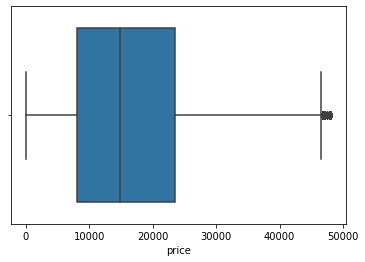

In [77]:
sns.boxplot(x=full['price'])

Here is a box plot to have visual of the price ranges. 

In [78]:
MSRP_Q1 = np.quantile(full['MSRP'],0.25)
MSRP_Q3 = np.quantile(full['MSRP'],0.75)
MSRP_IQR = MSRP_Q3 - MSRP_Q1
MSRP_cut_off = MSRP_IQR * 1.5
MSRP_lower, MSRP_upper = MSRP_Q1 - MSRP_cut_off, MSRP_Q3 + MSRP_cut_off
MSRP_outliers = [x for x in full['MSRP'] if x < MSRP_lower or x > MSRP_upper]
MSRP_removed = [x for x in full['MSRP'] if x > MSRP_lower and x < MSRP_upper]
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (MSRP_Q1, MSRP_Q3, MSRP_IQR))
print('outliers: %d' % len(MSRP_outliers))
print('Non-outlier: %d' % len(MSRP_removed))

Percentiles: 25th=26374.000, 75th=38160.000, IQR=11786.000
outliers: 3414
Non-outlier: 270788


In [79]:
full = full[full['MSRP'].between(8695.0 , 55839.0)]

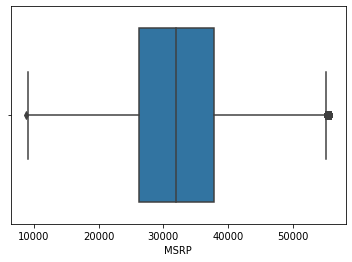

In [80]:
sns.boxplot(x=full['MSRP'])

In [81]:
odo_Q1 = np.quantile(full['odometer'],0.25)
odo_Q3 = np.quantile(full['odometer'],0.75)
odo_IQR = odo_Q3 - odo_Q1
odo_cut_off = odo_IQR * 1.5
odo_lower, odo_upper = odo_Q1 - odo_cut_off, odo_Q3 + odo_cut_off
odo_outliers = [x for x in full['odometer'] if x < odo_lower or x > odo_upper]
odo_removed = [x for x in full['odometer'] if x > odo_lower and x < odo_upper]
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (odo_Q1, odo_Q3, odo_IQR))
print('outliers: %d' % len(odo_outliers))
print('Non-outlier: %d' % len(odo_removed))

Percentiles: 25th=80121.000, 75th=158588.000, IQR=78467.000
outliers: 3721
Non-outlier: 267067


In [82]:
full = full[full['odometer'].between(-37579.5, 276288.5)]

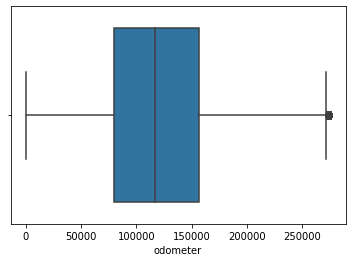

In [83]:
sns.boxplot(x=full['odometer'])

In [84]:
full.shape

(267067, 12)

The new shape of the dataset is 267,067 rows after the outliers were removed. 

In [85]:
full['price'].describe()

count    267067.000000
mean      16381.341671
std       10343.272022
min           1.000000
25%        7995.000000
50%       14800.000000
75%       23000.000000
max       47995.000000
Name: price, dtype: float64

In [86]:
full['MSRP'].describe()

count    267067.000000
mean      32390.072252
std        8688.119053
min        8748.000000
25%       26330.000000
50%       31960.000000
75%       37900.000000
max       55835.000000
Name: MSRP, dtype: float64

In [87]:
full['year'].describe()

count    267067.000000
mean       2011.245006
std           4.621125
min        1990.000000
25%        2008.000000
50%        2012.000000
75%        2015.000000
max        2019.000000
Name: year, dtype: float64

In [88]:
full['odometer'].describe()

count    267067.000000
mean     118559.055597
std       56483.564264
min           0.000000
25%       79796.000000
50%      117000.000000
75%      157000.000000
max      275670.000000
Name: odometer, dtype: float64

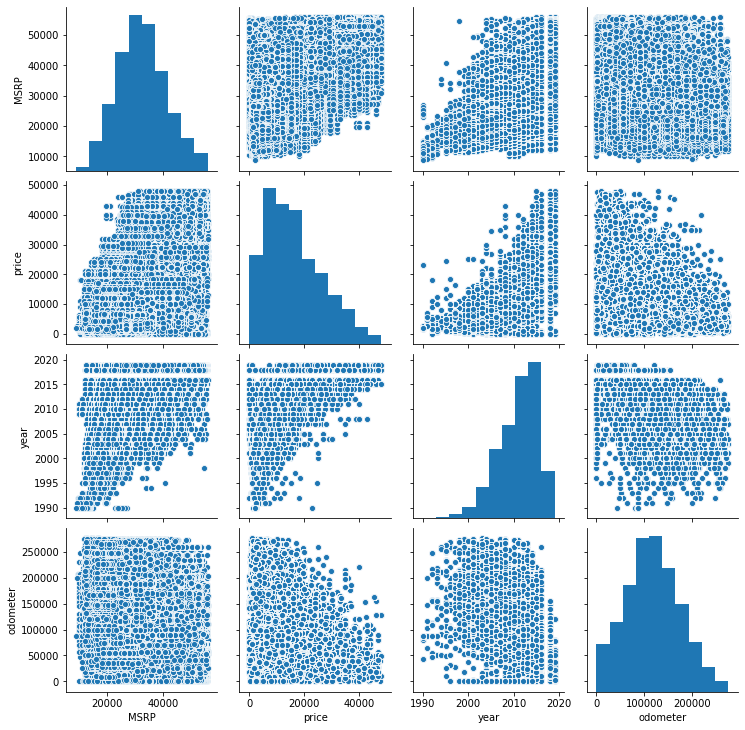

In [89]:
sns.pairplot(full)

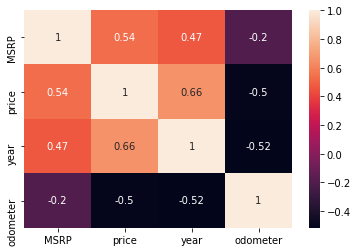

In [90]:
sns.heatmap(full.corr(), annot=True)

The pairplot shows the distribution of the numerical values within each column. Also the heatmap shows any correlations among the numerical values. There are some correlation but there is not strong correlations. There are also negative correlations. This is due to the price depriciating over time as well as the increase of the other features. 

The categorical data is explored using bar graphs to see the value count. 

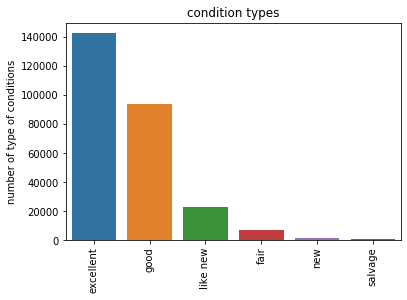

In [92]:
sns.barplot(x=full['condition'].value_counts().keys(), y=full['condition'].value_counts())
plt.ylabel('number of type of conditions')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title('condition types')
plt.show()

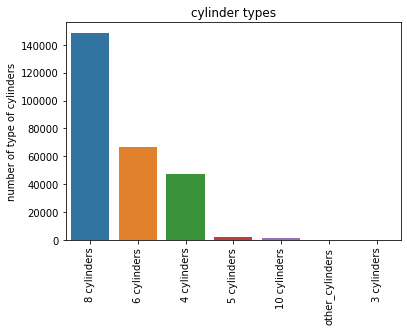

In [93]:
sns.barplot(x=full['cylinders'].value_counts().keys(), y=full['cylinders'].value_counts())
plt.ylabel('number of type of cylinders')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title('cylinder types')
plt.show()

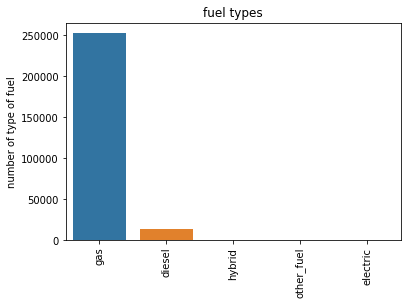

In [94]:
sns.barplot(x=full['fuel'].value_counts().keys(), y=full['fuel'].value_counts())
plt.ylabel('number of type of fuel')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title('fuel types')
plt.show()

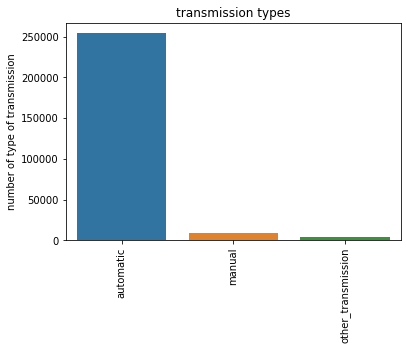

In [95]:
sns.barplot(x=full['transmission'].value_counts().keys(), y=full['transmission'].value_counts())
plt.ylabel('number of type of transmission')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title('transmission types')
plt.show()

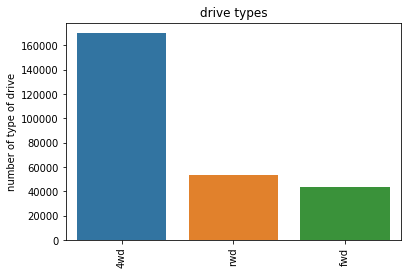

In [96]:
sns.barplot(x=full['drive'].value_counts().keys(), y=full['drive'].value_counts())
plt.ylabel('number of type of drive')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title('drive types')
plt.show()

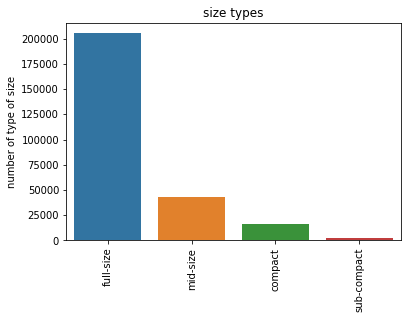

In [97]:
sns.barplot(x=full['size'].value_counts().keys(), y=full['size'].value_counts())
plt.ylabel('number of type of size')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title('size types')
plt.show()

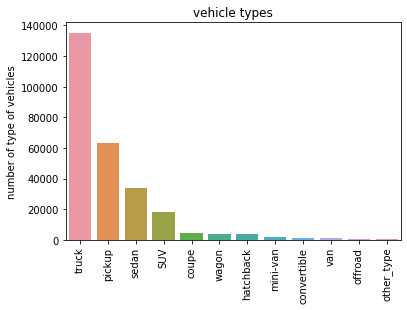

In [98]:
sns.barplot(x=full['type'].value_counts().keys(), y=full['type'].value_counts())
plt.ylabel('number of type of vehicles')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title('vehicle types')
plt.show()

## Pre-Processing

In [100]:
dummy = ['condition', 'cylinders', 'fuel',
        'transmission', 'drive', 'size', 'type']

In [101]:
new_X = full[dummy]

In [102]:
new_X = pd.get_dummies(new_X)

In [103]:
new_X.shape

(267067, 40)

The categorical data values are given numerical values using the get_dummies feature. The new shape of the data iset 267,067 rows and 40 columns. 

In [104]:
test_data = pd.concat([full, new_X], axis=1)
test_data.head()

,Model,MSRP,price,year,condition,cylinders,fuel,odometer,transmission,drive,...,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other_type,type_pickup,type_sedan,type_truck,type_van,type_wagon
0,2019 acura rdx,40600,36250,2019,excellent,4 cylinders,gas,31250,automatic,4wd,...,0,0,0,0,0,0,0,0,0,0
1,2019 acura rdx,45500,36250,2019,excellent,4 cylinders,gas,31250,automatic,4wd,...,0,0,0,0,0,0,0,0,0,0
2,2019 acura rdx,43600,36250,2019,excellent,4 cylinders,gas,31250,automatic,4wd,...,0,0,0,0,0,0,0,0,0,0
3,2019 acura rdx,37400,36250,2019,excellent,4 cylinders,gas,31250,automatic,4wd,...,0,0,0,0,0,0,0,0,0,0
4,2019 acura rdx,42600,36250,2019,excellent,4 cylinders,gas,31250,automatic,4wd,...,0,0,0,0,0,0,0,0,0,0


In [105]:
test_data = test_data.drop(columns=['Model', 'price', 'condition', 'cylinders', 'fuel',
        'transmission', 'drive', 'size', 'type'])
test_data

,MSRP,year,odometer,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,cylinders_10 cylinders,...,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other_type,type_pickup,type_sedan,type_truck,type_van,type_wagon
0,40600,2019,31250,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,45500,2019,31250,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,43600,2019,31250,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,37400,2019,31250,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,42600,2019,31250,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304065,35100,2003,205000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
304066,35100,2003,109000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
304067,34300,1998,144000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
304068,34300,1998,160000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [106]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [107]:
scaled = scaler.fit_transform(test_data)

In [108]:
scaled = pd.DataFrame(scaled)

In [109]:
scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0.944962,1.678165,-1.545746,0.934301,-0.161443,-0.734576,-0.303601,-0.064075,-0.041356,-0.07739,...,-0.129352,-0.119192,-0.080063,-0.032627,-0.029928,-0.556228,-0.380436,-1.013052,-0.062796,-0.119853
1,1.508952,1.678165,-1.545746,0.934301,-0.161443,-0.734576,-0.303601,-0.064075,-0.041356,-0.07739,...,-0.129352,-0.119192,-0.080063,-0.032627,-0.029928,-0.556228,-0.380436,-1.013052,-0.062796,-0.119853
2,1.290262,1.678165,-1.545746,0.934301,-0.161443,-0.734576,-0.303601,-0.064075,-0.041356,-0.07739,...,-0.129352,-0.119192,-0.080063,-0.032627,-0.029928,-0.556228,-0.380436,-1.013052,-0.062796,-0.119853
3,0.576642,1.678165,-1.545746,0.934301,-0.161443,-0.734576,-0.303601,-0.064075,-0.041356,-0.07739,...,-0.129352,-0.119192,-0.080063,-0.032627,-0.029928,-0.556228,-0.380436,-1.013052,-0.062796,-0.119853
4,1.175162,1.678165,-1.545746,0.934301,-0.161443,-0.734576,-0.303601,-0.064075,-0.041356,-0.07739,...,-0.129352,-0.119192,-0.080063,-0.032627,-0.029928,-0.556228,-0.380436,-1.013052,-0.062796,-0.119853


The data is then scaled in order for it to be evaluated. 

#### Train-Test Split

In [110]:
price = full['price']

In [111]:
x_train , x_test , y_train , y_test = train_test_split(scaled, price, test_size = 0.2,random_state =42)

In [112]:
print(x_train.shape)
print(y_train.shape)

(213653, 43)
(213653,)


## Modeling

#### Linear Regression

In [113]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred_lin = reg.predict(x_test)
print(reg.score(x_test, y_test))
print(reg.score(x_test, y_pred_lin))

0.7441263021085514
1.0


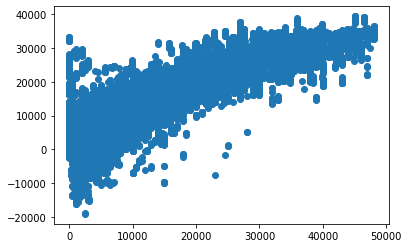

In [114]:
plt.scatter(y_test, y_pred_lin)

In [115]:
import sklearn.metrics as sm

print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_lin), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_lin), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_lin), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_lin), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_lin), 2))

Mean absolute error = 3910.62
Mean squared error = 27052164.51
Median absolute error = 3074.9
Explain variance score = 0.74
R2 score = 0.74


In [116]:
from sklearn.model_selection import cross_val_score

reg = LinearRegression()
cv_results = cross_val_score(reg, x_train, y_train, cv=5)
print(cv_results)
np.mean(cv_results)

[0.7404198  0.74066599 0.74139582 0.74451056 0.738155  ]


0.7410294323920137

#### Decision Tree

In [117]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train, y_train)
y_pred_dt = dt_reg.predict(x_test)
print(dt_reg.score(x_test, y_test))
print(dt_reg.score(x_test, y_pred_dt))

0.9929974500036859
1.0


In [118]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_dt), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_dt), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_dt), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_dt), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_dt), 2))

Mean absolute error = 89.33
Mean squared error = 740342.35
Median absolute error = 0.0
Explain variance score = 0.99
R2 score = 0.99


In [119]:
dt_reg = DecisionTreeRegressor()
cv_results = cross_val_score(dt_reg, x_train, y_train, cv=5)
print(cv_results)
np.mean(cv_results)

[0.99248478 0.99243984 0.9920234  0.99134877 0.98930854]


0.9915210665002201

In [120]:
from sklearn.model_selection import GridSearchCV

dt_reg = DecisionTreeRegressor()
paramters = {"max_features": [3, 4, 5], "max_depth":[2,4,6,8,10]}
dt_cv = GridSearchCV(dt_reg, paramters, cv=5)
dt_cv.fit(x_train, y_train)
dt_cv.best_params_

{'max_depth': 10, 'max_features': 5}

In [122]:
from sklearn.model_selection import cross_validate

dt_reg = DecisionTreeRegressor(max_features=5, max_depth=10)
dt_reg.fit(x_train, y_train)
print("train score:", dt_reg.score(x_train, y_train))
print("test score:", dt_reg.score(x_test, y_test))
print("average validation score:", (cross_validate(dt_reg, x_train, y_train, cv=5)["test_score"]).mean())

train score: 0.7213166433748365
test score: 0.7222674111622622
average validation score: 0.7149872292281975


#### Random Forest

In [123]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print(rf.score(x_test, y_test))
print(rf.score(x_test, y_pred_rf))

0.9942612931457928
1.0


In [124]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_rf), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_rf), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_rf), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_rf), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_rf), 2))

Mean absolute error = 107.3
Mean squared error = 606722.94
Median absolute error = 0.0
Explain variance score = 0.99
R2 score = 0.99


In [138]:
x_test.shape

(53414, 43)

In [144]:
sanity_test = x_test.iloc[5:10]
rf.fit(x_train, y_train)
sanity_pred = rf.predict(sanity_test)
print(sanity_pred)

[ 8339.14408001 34531.64555215  8547.45809411 14827.76557932
  8102.69364713]


In [146]:
print(y_test.iloc[5:10])

184160     8995
222337    27000
154112     8995
201946    18999
194022     7999
Name: price, dtype: int32


In [128]:
rf = RandomForestRegressor()
cv_results = cross_val_score(rf, x_train, y_train, cv=5)
print(cv_results)
np.mean(cv_results)

[0.99368567 0.99380064 0.99351186 0.99309971 0.99094343]


0.9930082617187272

In [129]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()
paramters = {"n_estimators": [100, 200, 300], "max_depth":[2,4,6,8,10]}
rf_cv = GridSearchCV(rf, paramters, cv=5)
rf_cv.fit(x_train, y_train)
rf_cv.best_params_

{'max_depth': 10, 'n_estimators': 100}

In [130]:
from sklearn.model_selection import cross_validate

rf = RandomForestRegressor(n_estimators=200, max_depth=10)
rf.fit(x_train, y_train)
print("train score:", rf.score(x_train, y_train))
print("test score:", rf.score(x_test, y_test))
print("average validation score:", (cross_validate(rf, x_train, y_train, cv=5)["test_score"]).mean())

train score: 0.8850127430455778
test score: 0.88474768660803
average validation score: 0.8839143601953501


#### Gradient Boosting

In [131]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)
y_pred_gb = gb.predict(x_test)
print(gb.score(x_test, y_test))
print(gb.score(x_test, y_pred_gb))

0.8357765227362856
1.0


In [132]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_gb), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_gb), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_gb), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_gb), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_gb), 2))

Mean absolute error = 3017.32
Mean squared error = 17362474.38
Median absolute error = 2272.67
Explain variance score = 0.84
R2 score = 0.84


In [133]:
gb = GradientBoostingRegressor()
cv_results = cross_val_score(gb, x_train, y_train, cv=5)
print(cv_results)
np.mean(cv_results)

[0.83179838 0.83347906 0.83320764 0.83352328 0.82695547]


0.8317927667210203

In [134]:
gb = GradientBoostingRegressor()
paramters = {"n_estimators": [100, 200, 300], "max_depth":[2,4,6,8,10]}
gb_cv = GridSearchCV(gb, paramters, cv=5)
gb_cv.fit(x_train, y_train)
gb_cv.best_params_

{'max_depth': 10, 'n_estimators': 300}

In [135]:
gb = GradientBoostingRegressor(n_estimators=300, max_depth=10)
gb.fit(x_train, y_train)
print("train score:", gb.score(x_train, y_train))
print("test score:", gb.score(x_test, y_test))
print("average validation score:", (cross_validate(gb, x_train, y_train, cv=5)["test_score"]).mean())

train score: 0.9902919329204866
test score: 0.988795378841026
average validation score: 0.9867725695710545


## Conclusion

The random Forest and Decision Tree model had high accuracy scores but after using cross-validation, the scores decreased in comparison to the original test score. These models can be found to be overfitting and will not be used. The gradient boosting model had the highest average validation score of 98.6% after using cross-validation. 

#### Future Improvements: 

   - Many of the vehicle listings are subjective conditions. A standard scaling method can be method to have a more consistent data set, which will make the estimated prices be more consistent with the market. 
   - Use the model for seller and buyers to input their own preferences to find an estimated price value. 